### Training and testing data 

sometimes we  train the model using  the entire data set but that not a good strategy the good  strategy is to split the data set into  two parts where  you use part of the samples for actual training and you use remaining samples for testing  you model,  and the reason is you want to use those samples for tasting the model because the model has not seen before  which  give us a good idea of accuracy of model <br/>

<p align="center" width="80%">
<img src="./images/4_train-test-split.jpg">
</p>

In [32]:
# lets coding 

import pandas as pd 


dataFrame = pd.read_csv("./data/carprices.csv")
dataFrame

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


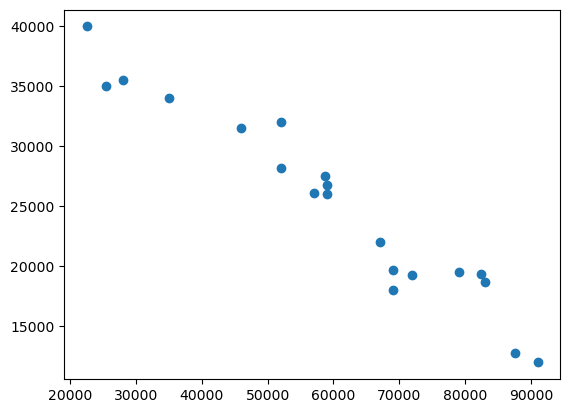

In [33]:
## first we need to scatter the values to see which model we gonna use 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.scatter(dataFrame["Mileage"],dataFrame["Sell Price($)"])

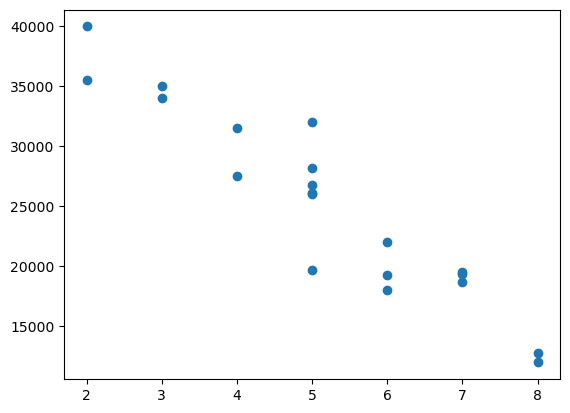

In [34]:
plt.scatter(dataFrame["Age(yrs)"],dataFrame["Sell Price($)"])


In [35]:
# so we can use linear regression to train this model 
from sklearn.linear_model import LinearRegression
# but we need to split our data 
from sklearn.model_selection import train_test_split


x=dataFrame.drop("Sell Price($)",axis=1)
y=dataFrame["Sell Price($)"]

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.33)
# when we don't using random state every time we run the code will take different samples but with random state the sample will be the same every time 

In [36]:
x_train

,Mileage,Age(yrs)
10,83000,7
2,57000,5
15,25400,3
13,58780,4
14,82450,7
7,72000,6
11,79000,7
19,52000,5
3,22500,2
9,67000,6


In [37]:
## now let's train our model 
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [38]:
model.predict(x_test)

array([25372.30266638, 14079.4047726 , 27452.70079045, 29830.06800566,
       33693.43388093, 15089.88386144, 36368.00082815])

In [39]:
y_test

5     26750
8     12000
6     32000
4     31500
1     34000
18    12800
16    35500
Name: Sell Price($), dtype: int64

In [40]:
model.score(x_test,y_test)## it will calculate all predictive values to all rows in x_test then compare it with real values that inside y_test 

0.9393950624287893

### Logistic Regression 

the main different between LinearRegression and the LogisticRegression is : linearReg predicted value is *Countinuous* (number)
where  logisticReg: predicted value is *Categorical* 

Categorical mean  that the thing you try to predict is one of the available categories  . hence this kind of problems called  Classifaction problems and logisticRegression is one of the techniques used for classification 


there are types of classifications
1. where we have two categories : Binary Classification 
2. where we have more than two categories : Multiclass Classification



Sigmoid (logit function ):  the sigmoid function equation is 
<p align="center"><img src="./images/segmoid.png"/></p>

what this equation doing here is dividing one by  a number  which is slightly greater than one  when we have this situation  the outcome it will be less than one  so all we doing with this function is converting inputs into range between 0 and 1 .
and if we try  to plot 2dimensional chart it will look like 'S' shape 

<p align="center" width="50%"><img src="./images/sigmoid2.png"/></p>

essentially what we are doing with logisticRegression is  feeding  linearEquation into a sigmoid function  and when we do that we converting line into s shape

In [41]:
import pandas as pd 


df = pd.read_csv("./data/insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


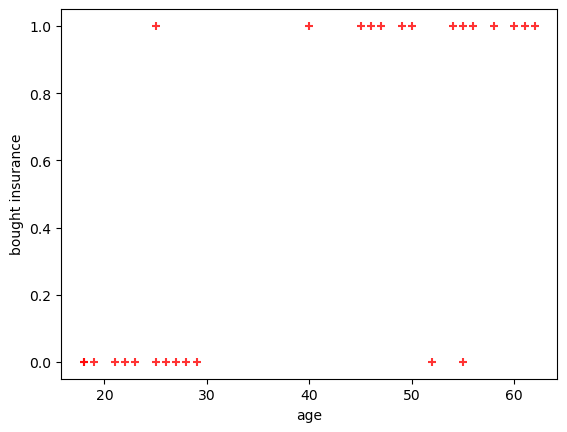

In [42]:
import matplotlib.pyplot as plt 
# we need to see data distribution 
%matplotlib inline 
plt.xlabel("age")
plt.ylabel("bought insurance")
plt.scatter(df["age"],df["bought_insurance"],marker="+", color="red",alpha=0.8)
plt.show()
#? how to draw line in scatter plot  below code is wrong 


In [43]:
x = df[["age"]] # we used to brackets because x should be multidimesnional
y = df["bought_insurance"]

print(x.shape)
from sklearn.model_selection import train_test_split



x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3)

(27, 1)


In [44]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train,y_train)
clf.predict(x_test)



array([0, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [45]:
print(clf.coef_)

[[0.10116809]]


In [46]:
clf.intercept_

array([-4.09001937])

In [47]:
clf.score(x_test,y_test)

1.0

In [48]:
clf.predict_proba(x_test)

array([[0.85360415, 0.14639585],
       [0.1863012 , 0.8136988 ],
       [0.2752025 , 0.7247975 ],
       [0.87712581, 0.12287419],
       [0.11093419, 0.88906581],
       [0.1213118 , 0.8786882 ],
       [0.36268883, 0.63731117],
       [0.17144884, 0.82855116],
       [0.77856318, 0.22143682]])

In [49]:
clf.predict([[56]])

array([1], dtype=int64)

### LogisticRegression 
MultiClass classification 

In [50]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 


digits = load_digits()

listem = dir(digits) ## dir : returns a list of the attributes and methods of any object 

In [51]:
for attri in listem: 
  print( attri , type(digits[attri]) ) 

DESCR <class 'str'>
data <class 'numpy.ndarray'>
feature_names <class 'list'>
frame <class 'NoneType'>
images <class 'numpy.ndarray'>
target <class 'numpy.ndarray'>
target_names <class 'numpy.ndarray'>


<Figure size 640x480 with 0 Axes>

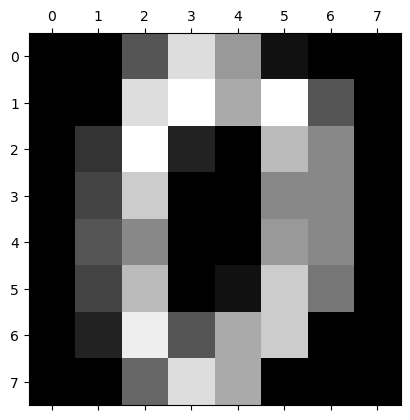

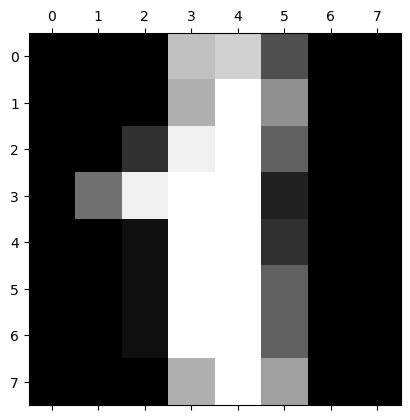

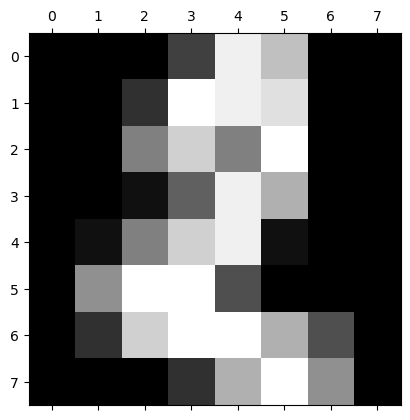

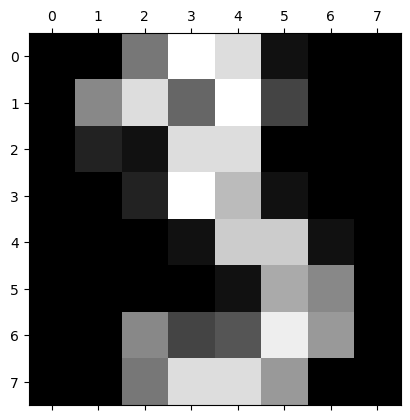

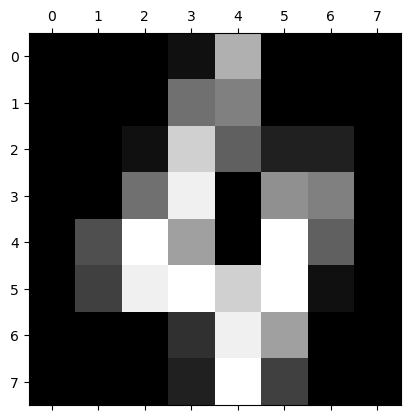

In [52]:
plt.gray() ## turn the image to black&White
for i in range(5):
  plt.matshow(digits.images[i])#[0:5] doesn't work here so i forced to use for loop

In [53]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [54]:
digits.images.shape

(1797, 8, 8)

In [55]:
digits.data.shape

(1797, 64)

In [56]:
digits.target.shape

(1797,)

In [57]:
# TODO :  read about reshaping 
# plt.scatter(digits.data, digits.target.reshape(-1,1))

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train,x_test , y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2)


In [59]:
model = LogisticRegression()

model.fit(x_train,y_train)

c:\Users\Ubey\anaconda3\envs\anlp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
model.score(x_test,y_test)

0.9444444444444444

Text(95.72222222222221, 0.5, 'Truth')

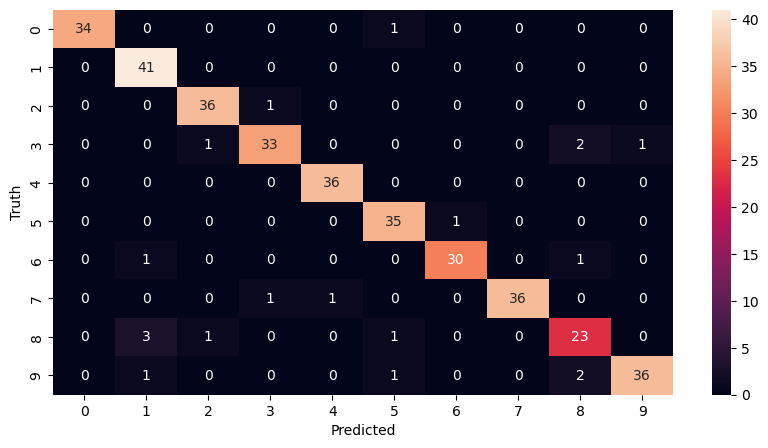

In [61]:
 #! How do we know where exactly  our model don't do well?  
 # one of the ways to do that is confusion matrics 
y_predicted = model.predict(x_test) ## the first step is get predicted value 
# 2ndly  we will create our confusion matrix 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)
# then we will using seaborn to visualiz confusion matrix 

import seaborn as sb
plt.figure(figsize = (10,5))
sb.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")



